In [21]:
import random
import pickle

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, RMSprop, Adam
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from utils import load_all_images, get_class_name

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

PIXELS = 200

In [2]:
# settings
plt.style.use('seaborn')
plt.show()
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.figsize"] = (8, 5)

## Load, Shuffle & Split Data

In [12]:
x, y = load_all_images(
    classes=["sunny", "cloudy", "foggy", "rainy", "snowy"], pixels=PIXELS
)
# make them as numpy array
x = np.array(x)
y = np.array(y)

# shuffle and split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.8, shuffle=True, random_state=777
)

y_train_labels = y_train.copy()
y_test_labels = y_test.copy()

# convert class vector into binary matrix
y_train = to_categorical(y_test)
y_test = to_categorical(y_train)

x_train.shape, y_train.shape

((14431, 40000), (3608, 5))

In [ ]:
# TODO fix get_class_name method to handle binary matrix
i = 67
plt.figure(figsize=(3, 3))
plt.imshow(x[i].reshape((PIXELS, PIXELS)), cmap=plt.get_cmap('gray'))
plt.title(f'An image sample of class: {get_class_name(y[i])}')

plt.show()

## Sequential Model
### Basic Implementation

### Find Best `batch_size`

In [ ]:
sizes = [16, 32, 64, 128, 256, 512]
results = pd.DataFrame(
    {
        "loss": [None] * len(sizes),
        "accuracy": [None] * len(sizes),
    },
    index=sizes,
)

for size in sizes:
    model = Sequential([
        Dense(units=2**10, activation='relu', input_dim=PIXELS**2),
        Dense(units=5, activation='softmax'),
    ])

    # Define how our model is going to learn
    model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics='accuracy')
    
    # train model
    history = model.fit(
        x_train,
        y_train,
        batch_size=size,
        epochs=20,
        validation_split=0.2,
        shuffle=True,
    )

    results.loc[size] = model.evaluate(x_test, y_test)


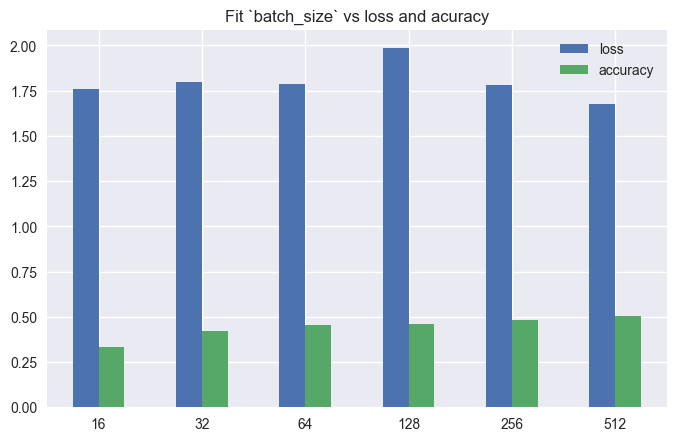

In [200]:
results.plot.bar()
plt.xticks(rotation=0)
plt.title('Fit `batch_size` vs loss and acuracy')
plt.show()

In [ ]:
model = Sequential([
    Dense(units=2**10, activation='relu', input_dim=PIXELS**2),
    Dense(units=5, activation='softmax'),
])

# 2. Define how our model is going to learn
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics='accuracy')

# train model
history = model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=20,
    validation_split=0.2,
)

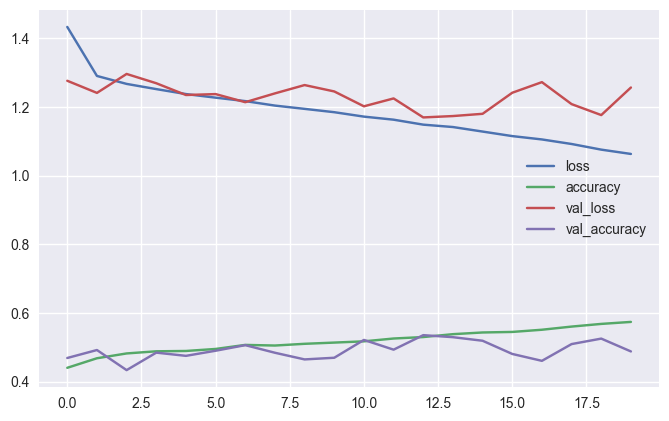

113/113 [==============================] - 2s 16ms/step - loss: 1.3149 - accuracy: 0.4568


[1.3148653507232666, 0.45676273107528687]

In [9]:
pd.DataFrame(history.history).plot()
plt.show()
model.evaluate(x_test, y_test)

### Search for Best Learning Rate

In [ ]:
model = Sequential(
    [
        Dense(units=2**10, activation="relu", input_dim=PIXELS**2),
        Dense(units=5, activation="softmax"),
    ]
)

# 2. Define how our model is going to learn
model.compile(
    loss="categorical_crossentropy",
    optimizer=SGD(learning_rate=0.01, momentum=0.01),
    metrics="accuracy",
)

# train model
history = model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=20,
    validation_split=0.2,
    callbacks=[
        EarlyStopping(patience=3, min_delta=0.0001, restore_best_weights=True),
        ReduceLROnPlateau(patience=1, factor=0.1)
    ],
)

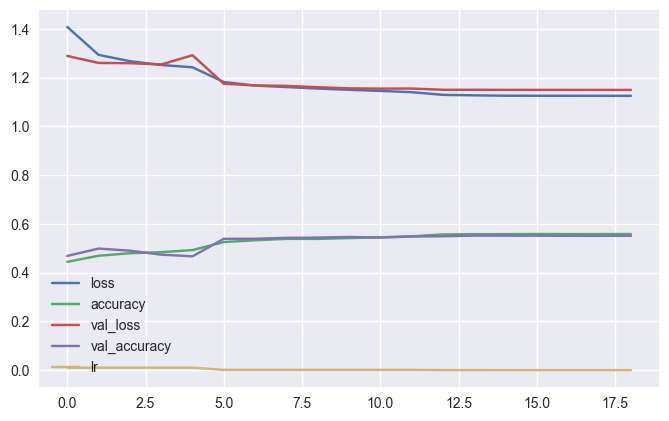

113/113 [==============================] - 2s 15ms/step - loss: 1.1983 - accuracy: 0.5272


[1.1982755661010742, 0.5271618366241455]

In [5]:
pd.DataFrame(history.history).plot()
plt.show()
model.evaluate(x_test, y_test)

In [11]:
y_test

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

113/113 [==============================] - 1s 10ms/step


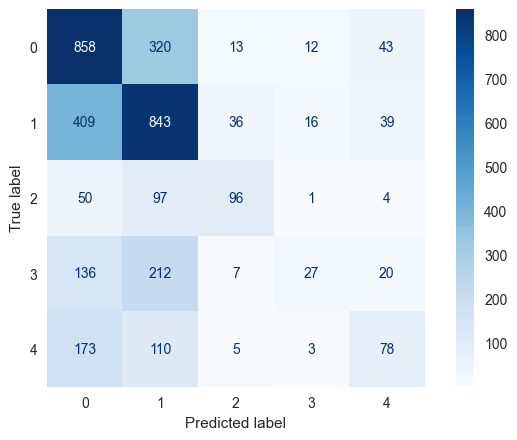

In [20]:
predictions = model.predict(x_test)
pred_values = np.argmax(predictions, axis=1)

cm = confusion_matrix(y_test_labels, pred_values)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)
plt.show()